In [2]:
%matplotlib inline
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import signal

In [3]:
import sys
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#import xgboost as xgb
from sklearn import tree

In [3]:
#sys.path.insert(0,'/Users/paiys/Downloads/xgboost/python-package')  #add xgboost manually from directory
#import xgboost as xgb

In [368]:
df = pd.read_csv("MLdata/1A.csv")
df.head()

,Alpha FP2,Alpha P4,Alpha O2,Alpha FP1,Alpha O1,Alpha Pz,Alpha P3,condition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [372]:
filtered = signal.medfilt(df[['Alpha FP2','Alpha P4',' Alpha O2','Alpha FP1','Alpha O1','Alpha Pz','Alpha P3']])
df[['Alpha FP2','Alpha P4',' Alpha O2','Alpha FP1','Alpha O1','Alpha Pz','Alpha P3']] = filtered

In [373]:
df

,Alpha FP2,Alpha P4,Alpha O2,Alpha FP1,Alpha O1,Alpha Pz,Alpha P3,condition
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,0.000000,0.871495,0.871495,1.213644,0.327311,0.327311,0.000000,1
6,0.871495,2.362235,2.362235,2.362235,1.213644,0.350175,0.327311,1
7,0.871495,2.362235,2.362235,2.362235,1.213644,0.350175,0.327311,1
8,0.871495,2.362235,2.362235,2.362235,1.213644,0.350175,0.327311,1
9,0.871495,2.362235,2.362235,2.362235,1.213644,0.350175,0.327311,1


In [362]:
#df = df[(df != 0).all(1)]

In [363]:
window = 450  #3 seconds
mean_FP2 = df['Alpha FP2'].rolling(window).mean()
std_FP2 = df['Alpha FP2'].rolling(window).std()
var_FP2 = df['Alpha FP2'].rolling(window).var()
skew_FP2 = df['Alpha FP2'].rolling(window).skew()
kur_FP2 = df['Alpha FP2'].rolling(window).kurt()

mean_P4 = df['Alpha P4'].rolling(window).mean()
std_P4 = df['Alpha P4'].rolling(window).std()
var_P4 = df['Alpha P4'].rolling(window).var()
skew_P4 = df['Alpha P4'].rolling(window).skew()
kur_P4 = df['Alpha P4'].rolling(window).kurt()

mean_O2 = df[' Alpha O2'].rolling(window).mean()
std_O2 = df[' Alpha O2'].rolling(window).std()
var_O2 = df[' Alpha O2'].rolling(window).var()
skew_O2 = df[' Alpha O2'].rolling(window).skew()
kur_O2 = df[' Alpha O2'].rolling(window).kurt()

mean_FP1 = df['Alpha FP1'].rolling(window).mean()
std_FP1 = df['Alpha FP1'].rolling(window).std()
var_FP1 = df['Alpha FP1'].rolling(window).var()
skew_FP1 = df['Alpha FP1'].rolling(window).skew()
kur_FP1 = df['Alpha FP1'].rolling(window).kurt()

mean_O1 = df['Alpha O1'].rolling(window).mean()
std_O1 = df['Alpha O1'].rolling(window).std()
var_O1 = df['Alpha O1'].rolling(window).var()
skew_O1 = df['Alpha O1'].rolling(window).skew()
kur_O1 = df['Alpha O1'].rolling(window).kurt()

mean_Pz = df['Alpha Pz'].rolling(window).mean()
std_Pz = df['Alpha Pz'].rolling(window).std()
var_Pz = df['Alpha Pz'].rolling(window).var()
skew_Pz = df['Alpha Pz'].rolling(window).skew()
kur_Pz = df['Alpha Pz'].rolling(window).kurt()

mean_P3 = df['Alpha P3'].rolling(window).mean()
std_P3 = df['Alpha P3'].rolling(window).std()
var_P3 = df['Alpha P3'].rolling(window).var()
skew_P3 = df['Alpha P3'].rolling(window).skew()
kur_P3 = df['Alpha P3'].rolling(window).kurt()

In [364]:
df2 = pd.DataFrame({'mean_FP2': mean_FP2,'std_FP2': std_FP2,'var_FP2': var_FP2,'skew_FP2': skew_FP2,'kur_FP2': kur_FP2,
                    'mean_P4': mean_P4,'std_P4': std_P4,'var_P4': var_P4,'skew_P4': skew_P4,'kur_P4': kur_P4,
                    'mean_O2': mean_O2,'std_O2': std_O2,'var_O2': var_O2,'skew_O2': skew_O2,'kur_O2': kur_O2,
                    'mean_FP1': mean_FP1,'std_FP1': std_FP1,'var_FP1': var_FP1,'skew_FP1': skew_FP1,'kur_FP1': kur_FP1,
                    'mean_O1': mean_O1,'std_O1': std_O1,'var_O1': var_O1,'skew_O1': skew_O1,'kur_O1': kur_O1,
                    'mean_Pz': mean_Pz,'std_Pz': std_Pz,'var_Pz': var_Pz,'skew_Pz': skew_Pz,'kur_Pz': kur_Pz,
                    'mean_P3': mean_P3,'std_P3': std_P3,'var_P3': var_P3,'skew_P3': skew_P3,'kur_P3': kur_P3,
                    'condition': df['condition']})

In [365]:
final_df = df2.dropna()

In [366]:
final_df.head()

,mean_FP2,std_FP2,var_FP2,skew_FP2,kur_FP2,mean_P4,std_P4,var_P4,skew_P4,kur_P4,...,std_Pz,var_Pz,skew_Pz,kur_Pz,mean_P3,std_P3,var_P3,skew_P3,kur_P3,condition
455,0.235808,0.117954,0.013913,1.724507,1.846938,0.572677,0.178919,0.032012,0.811912,-0.610050,...,0.082256,0.006766,0.595022,-0.586569,0.119548,0.058036,0.003368,-0.079083,-1.774832,4
456,0.236834,0.119117,0.014189,1.714306,1.798576,0.573851,0.180579,0.032609,0.823053,-0.566036,...,0.082751,0.006848,0.595463,-0.587191,0.119814,0.058069,0.003372,-0.087628,-1.773631,4
457,0.237860,0.120261,0.014463,1.703608,1.748220,0.575025,0.182217,0.033203,0.832806,-0.528467,...,0.083239,0.006929,0.595440,-0.589119,0.120081,0.058101,0.003376,-0.096180,-1.772267,4
458,0.238886,0.121384,0.014734,1.692476,1.696273,0.576199,0.183833,0.033794,0.841282,-0.496683,...,0.083721,0.007009,0.594981,-0.592229,0.120347,0.058132,0.003379,-0.104741,-1.770741,4
459,0.239912,0.122489,0.015004,1.680968,1.643081,0.577373,0.185427,0.034383,0.848584,-0.470100,...,0.084197,0.007089,0.594115,-0.596412,0.120613,0.058161,0.003383,-0.113310,-1.769051,4


In [367]:
export_csv = final_df.to_csv ("MLdata/13C_extracted.csv", index = None, header=True)

TRAINING!!

In [5]:
df1 = pd.read_csv("MLdata/1A_extracted.csv")
df2 = pd.read_csv("MLdata/1C_extracted.csv")
df3 = pd.read_csv("MLdata/1D_extracted.csv")
df4 = pd.read_csv("MLdata/2A_extracted.csv")
df5 = pd.read_csv("MLdata/2B_extracted.csv")
df6 = pd.read_csv("MLdata/2C_extracted.csv")
df7 = pd.read_csv("MLdata/2D_extracted.csv")
df8 = pd.read_csv("MLdata/3A_extracted.csv")
df9 = pd.read_csv("MLdata/3B_extracted.csv")
df10 = pd.read_csv("MLdata/3C_extracted.csv")
df11 = pd.read_csv("MLdata/3D_extracted.csv")
df12 = pd.read_csv("MLdata/4A_extracted.csv")
df13 = pd.read_csv("MLdata/4C_extracted.csv")
df14 = pd.read_csv("MLdata/4D_extracted.csv")
df15 = pd.read_csv("MLdata/5A_extracted.csv")
df16 = pd.read_csv("MLdata/5B_extracted.csv")
df17 = pd.read_csv("MLdata/5C_extracted.csv")
df18 = pd.read_csv("MLdata/5D_extracted.csv")
df19 = pd.read_csv("MLdata/6A_extracted.csv")
df20 = pd.read_csv("MLdata/6B_extracted.csv")
df21 = pd.read_csv("MLdata/6C_extracted.csv")
df22 = pd.read_csv("MLdata/6D_extracted.csv")
df23 = pd.read_csv("MLdata/7A_extracted.csv")
df24 = pd.read_csv("MLdata/7B_extracted.csv")
df25 = pd.read_csv("MLdata/7C_extracted.csv")
df26 = pd.read_csv("MLdata/7D_extracted.csv")
df27 = pd.read_csv("MLdata/8A_extracted.csv")
df28 = pd.read_csv("MLdata/8B_extracted.csv")
df29 = pd.read_csv("MLdata/8C_extracted.csv")
df30 = pd.read_csv("MLdata/8D_extracted.csv")
df31 = pd.read_csv("MLdata/9A_extracted.csv")
df32 = pd.read_csv("MLdata/9B_extracted.csv")
df33 = pd.read_csv("MLdata/9C_extracted.csv")
df34 = pd.read_csv("MLdata/9D_extracted.csv")
df35 = pd.read_csv("MLdata/11A_extracted.csv")
df36 = pd.read_csv("MLdata/11D_extracted.csv")
df37 = pd.read_csv("MLdata/12A_extracted.csv")
df38 = pd.read_csv("MLdata/12B_extracted.csv")
df39 = pd.read_csv("MLdata/12C_extracted.csv")
df40 = pd.read_csv("MLdata/12D_extracted.csv")
df41 = pd.read_csv("MLdata/13A_extracted.csv")
df42 = pd.read_csv("MLdata/13B_extracted.csv")
df43 = pd.read_csv("MLdata/13D_extracted.csv")

In [6]:
final_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,
          df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
          df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,
          df31,df32,df33,df34,df35,df36,df37,df38,df39,df40,
          df41,df42,df43])

In [7]:
final_df = final_df.reset_index(drop=True)

In [8]:
features = final_df.columns[:35]
features

Index(['mean_FP2', 'std_FP2', 'var_FP2', 'skew_FP2', 'kur_FP2', 'mean_P4',
       'std_P4', 'var_P4', 'skew_P4', 'kur_P4', 'mean_O2', 'std_O2', 'var_O2',
       'skew_O2', 'kur_O2', 'mean_FP1', 'std_FP1', 'var_FP1', 'skew_FP1',
       'kur_FP1', 'mean_O1', 'std_O1', 'var_O1', 'skew_O1', 'kur_O1',
       'mean_Pz', 'std_Pz', 'var_Pz', 'skew_Pz', 'kur_Pz', 'mean_P3', 'std_P3',
       'var_P3', 'skew_P3', 'kur_P3'],
      dtype='object')

In [9]:
labels = final_df.columns[35]
labels

'condition'

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Separating out the features
x = final_df.loc[:,features].values
# Separating out the target
y = final_df.loc[:,labels].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [12]:
from sklearn.decomposition import PCA

In [13]:
com_num = 10
pca = PCA(n_components=com_num)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2' , 'pc3' , 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

In [14]:
df_pca = pd.concat([principalDf, final_df[labels]], axis = 1)

In [15]:
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,condition
0,-1.203630,2.493812,-3.936487,-0.011681,2.118426,-0.349085,-0.111439,-0.780325,-0.288089,0.348291,1
1,-1.199445,2.458068,-3.873007,0.008809,2.072087,-0.354886,-0.073829,-0.776354,-0.299722,0.349860,1
2,-1.194697,2.418428,-3.802411,0.027656,2.020560,-0.362184,-0.032722,-0.770762,-0.314375,0.351661,1
3,-1.189334,2.374556,-3.724080,0.044616,1.963332,-0.371218,0.012178,-0.763354,-0.332378,0.353715,1
4,-1.183274,2.328290,-3.640344,0.044449,1.901862,-0.379565,0.073988,-0.755569,-0.355840,0.356135,1


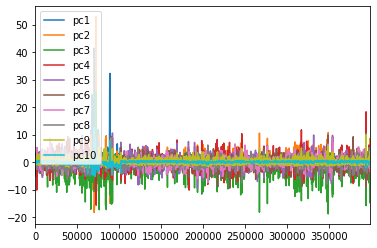

In [16]:
df_pca[['pc1','pc2','pc3','pc4','pc5','pc6', 'pc7', 'pc8', 'pc9', 'pc10']].plot()

In [17]:
features = df_pca.columns[:com_num]
features

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'], dtype='object')

In [18]:
labels = df_pca.columns[com_num]
labels

'condition'

In [19]:
preprocessing.normalize(df_pca[features])

array([[-0.22506953,  0.46632378, -0.73609282, ..., -0.14591474,
        -0.05387039,  0.0651277 ],
       [-0.22781184,  0.4668636 , -0.73560456, ..., -0.14745375,
        -0.05692659,  0.06644937],
       [-0.2309194 ,  0.46745089, -0.73495687, ..., -0.14897837,
        -0.06076467,  0.06797158],
       ...,
       [-0.17147763,  0.38808491, -0.61962236, ...,  0.11585001,
         0.13501704,  0.002914  ],
       [-0.17205232,  0.38786737, -0.61864618, ...,  0.11175149,
         0.1320124 ,  0.00386742],
       [-0.17281582,  0.38764893, -0.61759186, ...,  0.10806115,
         0.12877538,  0.00486794]])

In [20]:
df_pca[features] = preprocessing.normalize(df_pca[features])

In [21]:
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,condition
0,-0.225070,0.466324,-0.736093,-0.002184,0.396129,-0.065276,-0.020838,-0.145915,-0.053870,0.065128,1
1,-0.227812,0.466864,-0.735605,0.001673,0.393554,-0.067404,-0.014022,-0.147454,-0.056927,0.066449,1
2,-0.230919,0.467451,-0.734957,0.005345,0.390548,-0.070005,-0.006325,-0.148978,-0.060765,0.067972,1
3,-0.234447,0.468083,-0.734107,0.008795,0.387021,-0.073176,0.002401,-0.150476,-0.065520,0.069726,1
4,-0.238251,0.468799,-0.732980,0.008950,0.382938,-0.076425,0.014897,-0.152133,-0.071648,0.071707,1


In [22]:
all_label = set(df_pca['condition'])
for one_label in all_label:
    part_df = df_pca.loc[df_pca['condition']==one_label]
    flag = np.arange(len(part_df))
    flag_tf = flag < len(part_df)*0.80
    df_pca.at[part_df.index.values,'is_train'] = flag_tf

In [23]:
train, test = df_pca[df_pca['is_train'] == True], df_pca[df_pca['is_train'] == False]

In [24]:
print('Number of observations in the training data: ', len(train))
print('Number of observations in the testing data: ', len(test))

Number of observations in the training data:  318992
Number of observations in the testing data:  79746


In [25]:
#clf = LogisticRegression(random_state=0, solver='saga',multi_class='ovr')  #76.54%
#clf = RandomForestClassifier(n_estimators=1000,random_state=0)
#clf = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
#clf = KNeighborsClassifier(n_neighbors=81)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=0)
clf = svm.SVC(kernel='poly',C=1.0,probability=True)
#clf = linear_model.SGDClassifier(loss="log", penalty="l2", max_iter=5)   #74.6%
#clf = LinearDiscriminantAnalysis()
#clf = tree.DecisionTreeClassifier()
clf.fit(train[features],train[labels])

c:\users\ypai433\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
pred = clf.predict(test[features])

In [27]:
clf.score(test[features],test[labels]) * 100

29.226544278082912

In [28]:
cross = pd.crosstab(test[labels],clf.predict(test[features]),rownames=['True Output'], colnames=['Predicted output'])
cross

Predicted output,1,2,4
True Output,,,
1,23,20991,66
2,0,23284,261
3,21,15448,0
4,60,19592,0


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(test[labels],clf.predict(test[features])))

              precision    recall  f1-score   support

           1       0.22      0.00      0.00     21080
           2       0.29      0.99      0.45     23545
           3       0.00      0.00      0.00     15469
           4       0.00      0.00      0.00     19652

    accuracy                           0.29     79746
   macro avg       0.13      0.25      0.11     79746
weighted avg       0.15      0.29      0.13     79746



c:\users\ypai433\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Predictions')

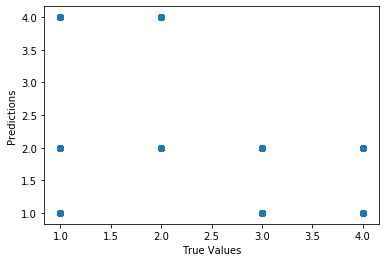

In [31]:
plt.scatter(test[labels], pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [32]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold # import KFold
from sklearn import metrics

In [33]:
# Perform 10-fold cross validation
model = clf.fit(train[features],train[labels])
scores = cross_val_score(model, df_pca[features], df_pca[labels], cv=10)
print("cross-validated score:", scores)

c:\users\ypai433\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MemoryError: 

In [ ]:
np.mean(scores)